In [7]:
import tensorflow as tf

2025-05-05 17:18:16.749459: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 17:18:17.067948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-05 17:18:17.068239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-05 17:18:17.123504: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-05 17:18:17.238521: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 17:18:17.240091: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [39]:
import re

['data/test_data/test_data/991.png', 'data/test_data/test_data/992.png', 'data/test_data/test_data/993.png', 'data/test_data/test_data/994.png', 'data/test_data/test_data/995.png', 'data/test_data/test_data/996.png', 'data/test_data/test_data/997.png', 'data/test_data/test_data/998.png', 'data/test_data/test_data/999.png']

re.findall(r'\d+', 'data/test_data/test_data/991.png')[-1]

'991'

In [25]:
import tensorflow as tf
import numpy as np


image_size = (224,244)
input_shape = (224,244,3)
batch_size = 1

train_angle, val_angle = tf.keras.preprocessing.image_dataset_from_directory('data/angle/', 
                                                                    labels = 'inferred', 
                                                                    label_mode = 'int',
                                                                    batch_size = batch_size,
                                                                    image_size = image_size,
                                                                    validation_split = 0.2,
                                                                    subset ='both', 
                                                                    seed = 42)

print(val_angle)


Found 1989 files belonging to 17 classes.
Using 1592 files for training.
Using 397 files for validation.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [4]:
import pandas as pd
import numpy as np 

image_df = pd.read_csv('../../data/training_norm.csv')
# train_labels = np.array(range(len(image_df)))

# categories_angle = [0.0, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625, 0.625, 0.6875, 0.75, 0.8125, 0.875, 0.9375, 1.0]
# categories_speed = [0, 1]

# for index, tensor in enumerate(image_df[['angle', 'speed']].values):
    
#     angle_tensor = np.zeros(len(categories_angle))
#     angle_tensor[categories_angle.index(tensor[0])] = 1
    
#     speed_tensor = np.zeros(len(categories_speed))
#     speed_tensor[int(tensor[1])] = 1
    
#     train_labels[index] = [angle_tensor, speed_tensor]
    
# print(train_labels.shape)
ignore = [4895, 3999, 8285, 10171, 3141, 3884]
for id in ignore: 
    image_df.drop(image_df[image_df['image_id'] == id].index, inplace=True)
            
image_df.describe()

,image_id,angle,speed
count,13792.000000,13792.000000,13792.000000
mean,6900.009136,0.605074,0.754205
std,3983.710908,0.155557,0.430573
min,1.000000,0.000000,0.000000
25%,3449.750000,0.500000,1.000000
50%,6900.500000,0.625000,1.000000
75%,10350.250000,0.750000,1.000000
max,13798.000000,1.000000,1.000000


In [ ]:
import numpy as np 
import pandas as pd
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_folder_name = 'UTKFace'
TRAIN_TEST_SPLIT = 0.7
IM_WIDTH = IM_HEIGHT = 198
dataset_dict = {
    'race_id': {
        0: 'white', 
        1: 'black', 
        2: 'asian', 
        3: 'indian', 
        4: 'others'
    },
    'gender_id': {
        0: 'male',
        1: 'female'
    }
}
dataset_dict['gender_alias'] = dict((g, i) for i, g in dataset_dict['gender_id'].items())
dataset_dict['race_alias'] = dict((r, i) for i, r in dataset_dict['race_id'].items())

In [ ]:
def parse_dataset(dataset_path, ext='jpg'):
    """
    Used to extract information about our dataset. It does iterate over all images and return a DataFrame with
    the data (age, gender and sex) of all files.
    """
    def parse_info_from_file(path):
        """
        Parse information from a single file
        """
        try:
            filename = os.path.split(path)[1]
            filename = os.path.splitext(filename)[0]
            age, gender, race, _ = filename.split('_')
            return int(age), dataset_dict['gender_id'][int(gender)], dataset_dict['race_id'][int(race)]
        except Exception as ex:
            return None, None, None
        
    files = glob.glob(os.path.join(dataset_path, "*.%s" % ext))
    
    records = []
    for file in files:
        info = parse_info_from_file(file)
        records.append(info)
        
    df = pd.DataFrame(records)
    df['file'] = files
    df.columns = ['age', 'gender', 'race', 'file']
    df = df.dropna()
    
    return df

df = parse_dataset(dataset_folder_name)
df.head()

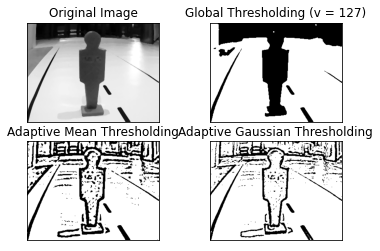

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img_no_blur = cv.imread('../../data/data/training_data/1.png')
assert img_no_blur is not None, "file could not be read, check with os.path.exists()"
gray_image = cv.cvtColor(img_no_blur, cv.COLOR_BGR2GRAY)
img = cv.medianBlur(gray_image,5)
 
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



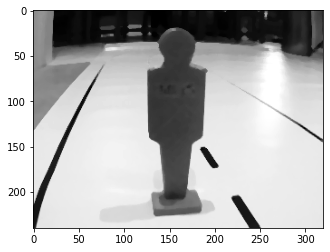

In [12]:
img_no_blur = cv.imread('../../data/data/training_data/1.png')
gray_image = cv.cvtColor(img_no_blur, cv.COLOR_BGR2GRAY)
img = cv.medianBlur(gray_image,5)
plt.imshow(img, cmap='gray')

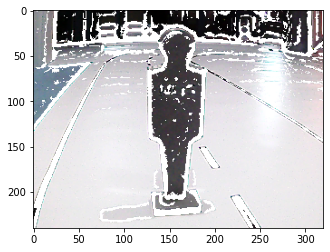

In [6]:
rgb_im = cv.imread('../../data/data/training_data/1.png')
rgb_im.ndim
r,g,b = cv.split(rgb_im)
merged_im = cv.merge([r, g, b, th3])
plt.imshow(merged_im)

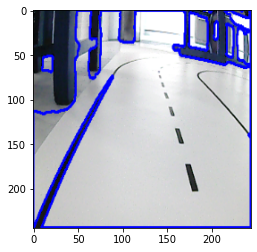

In [23]:
img_no_blur = cv.imread('../../data/data/training_data/2255.png')
gray_image = cv.cvtColor(img_no_blur, cv.COLOR_BGR2GRAY)
img = cv.medianBlur(gray_image,5)
 
# th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,11,2)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

#find the contours in the image
contours, heirarchy = cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#draw the obtained contour lines(or the set of coordinates forming a line) on the original image
cv.drawContours(img_no_blur, contours, -1, (0,0,255), 2)
#show the image

image = cv.resize(img_no_blur, (244,244))  # Resize images
# image = np.expand_dims(image, axis=0).astype(np.float32)
# image = tf.convert_to_tensor(image)

def load_im_for_picar_version(im_pth):
    image_colour = cv.imread(f"../../data/big_data/training_data/training_data/{im_pth}.png")
    image = cv.cvtColor(image_colour, cv.COLOR_BGR2GRAY)
    image = cv.medianBlur(image,5)
    ret,threshold = cv.threshold(image,127,255,cv.THRESH_BINARY)
    contours, heirarchy = cv.findContours(threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(image_colour, contours, -1, (0,0,255), 2)
    image_colour = cv.resize(image_colour, (244,244))
    
    return image_colour
    

image = load_im_for_picar_version(503)
plt.imshow(image)
#plt.imshow(th3)

(240, 320, 3)


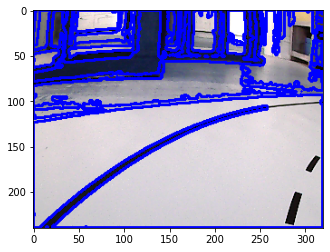

In [8]:
img_no_blur = cv.imread('../data/data/training_data/2.png')
print(img_no_blur.shape)
assert img_no_blur is not None, "file could not be read, check with os.path.exists()"
gray_image = cv.cvtColor(img_no_blur, cv.COLOR_BGR2GRAY)
img = cv.medianBlur(gray_image,5)
 
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

contours, heirarchy = cv.findContours(th3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#draw the obtained contour lines(or the set of coordinates forming a line) on the original image
cv.drawContours(img_no_blur, contours, -1, (0,0,255), 2)
#show the image
plt.imshow(img_no_blur)

In [24]:
import imutils
image = cv.imread('../data/data/training_data/3.png')
print(image.dtype)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
print(gray_image.dtype)
img = cv.medianBlur(gray_image,5)
print(img.dtype)
ret,threshold = cv.threshold(img,127,255,cv.THRESH_BINARY)
print(threshold.dtype)
contours, heirarchy = cv.findContours(threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#draw the obtained contour lines(or the set of coordinates forming a line) on the original image
cv.drawContours(image, contours, -1, (0,0,255), 2)
print(image.dtype)

image = cv.resize(image, (244,244)) 
image = image.astype(np.float32)# Resize images
print(image.dtype)
plt.imshow(image)
print(image.dtype)
print(image)

[ WARN:0@6270.625] global loadsave.cpp:268 findDecoder imread_('../data/data/training_data/3.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'dtype'